## KNN Assignment-2
Problem_Statement(Zoo)
Implement a KNN model to classify the animals in to categorie

In [1]:
##Import the file
import pandas as pd
df = pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/KNN/Zoo.csv", encoding='latin1')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
#check for missing values
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [3]:
df = df.drop("animal name",axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.shape

(101, 17)

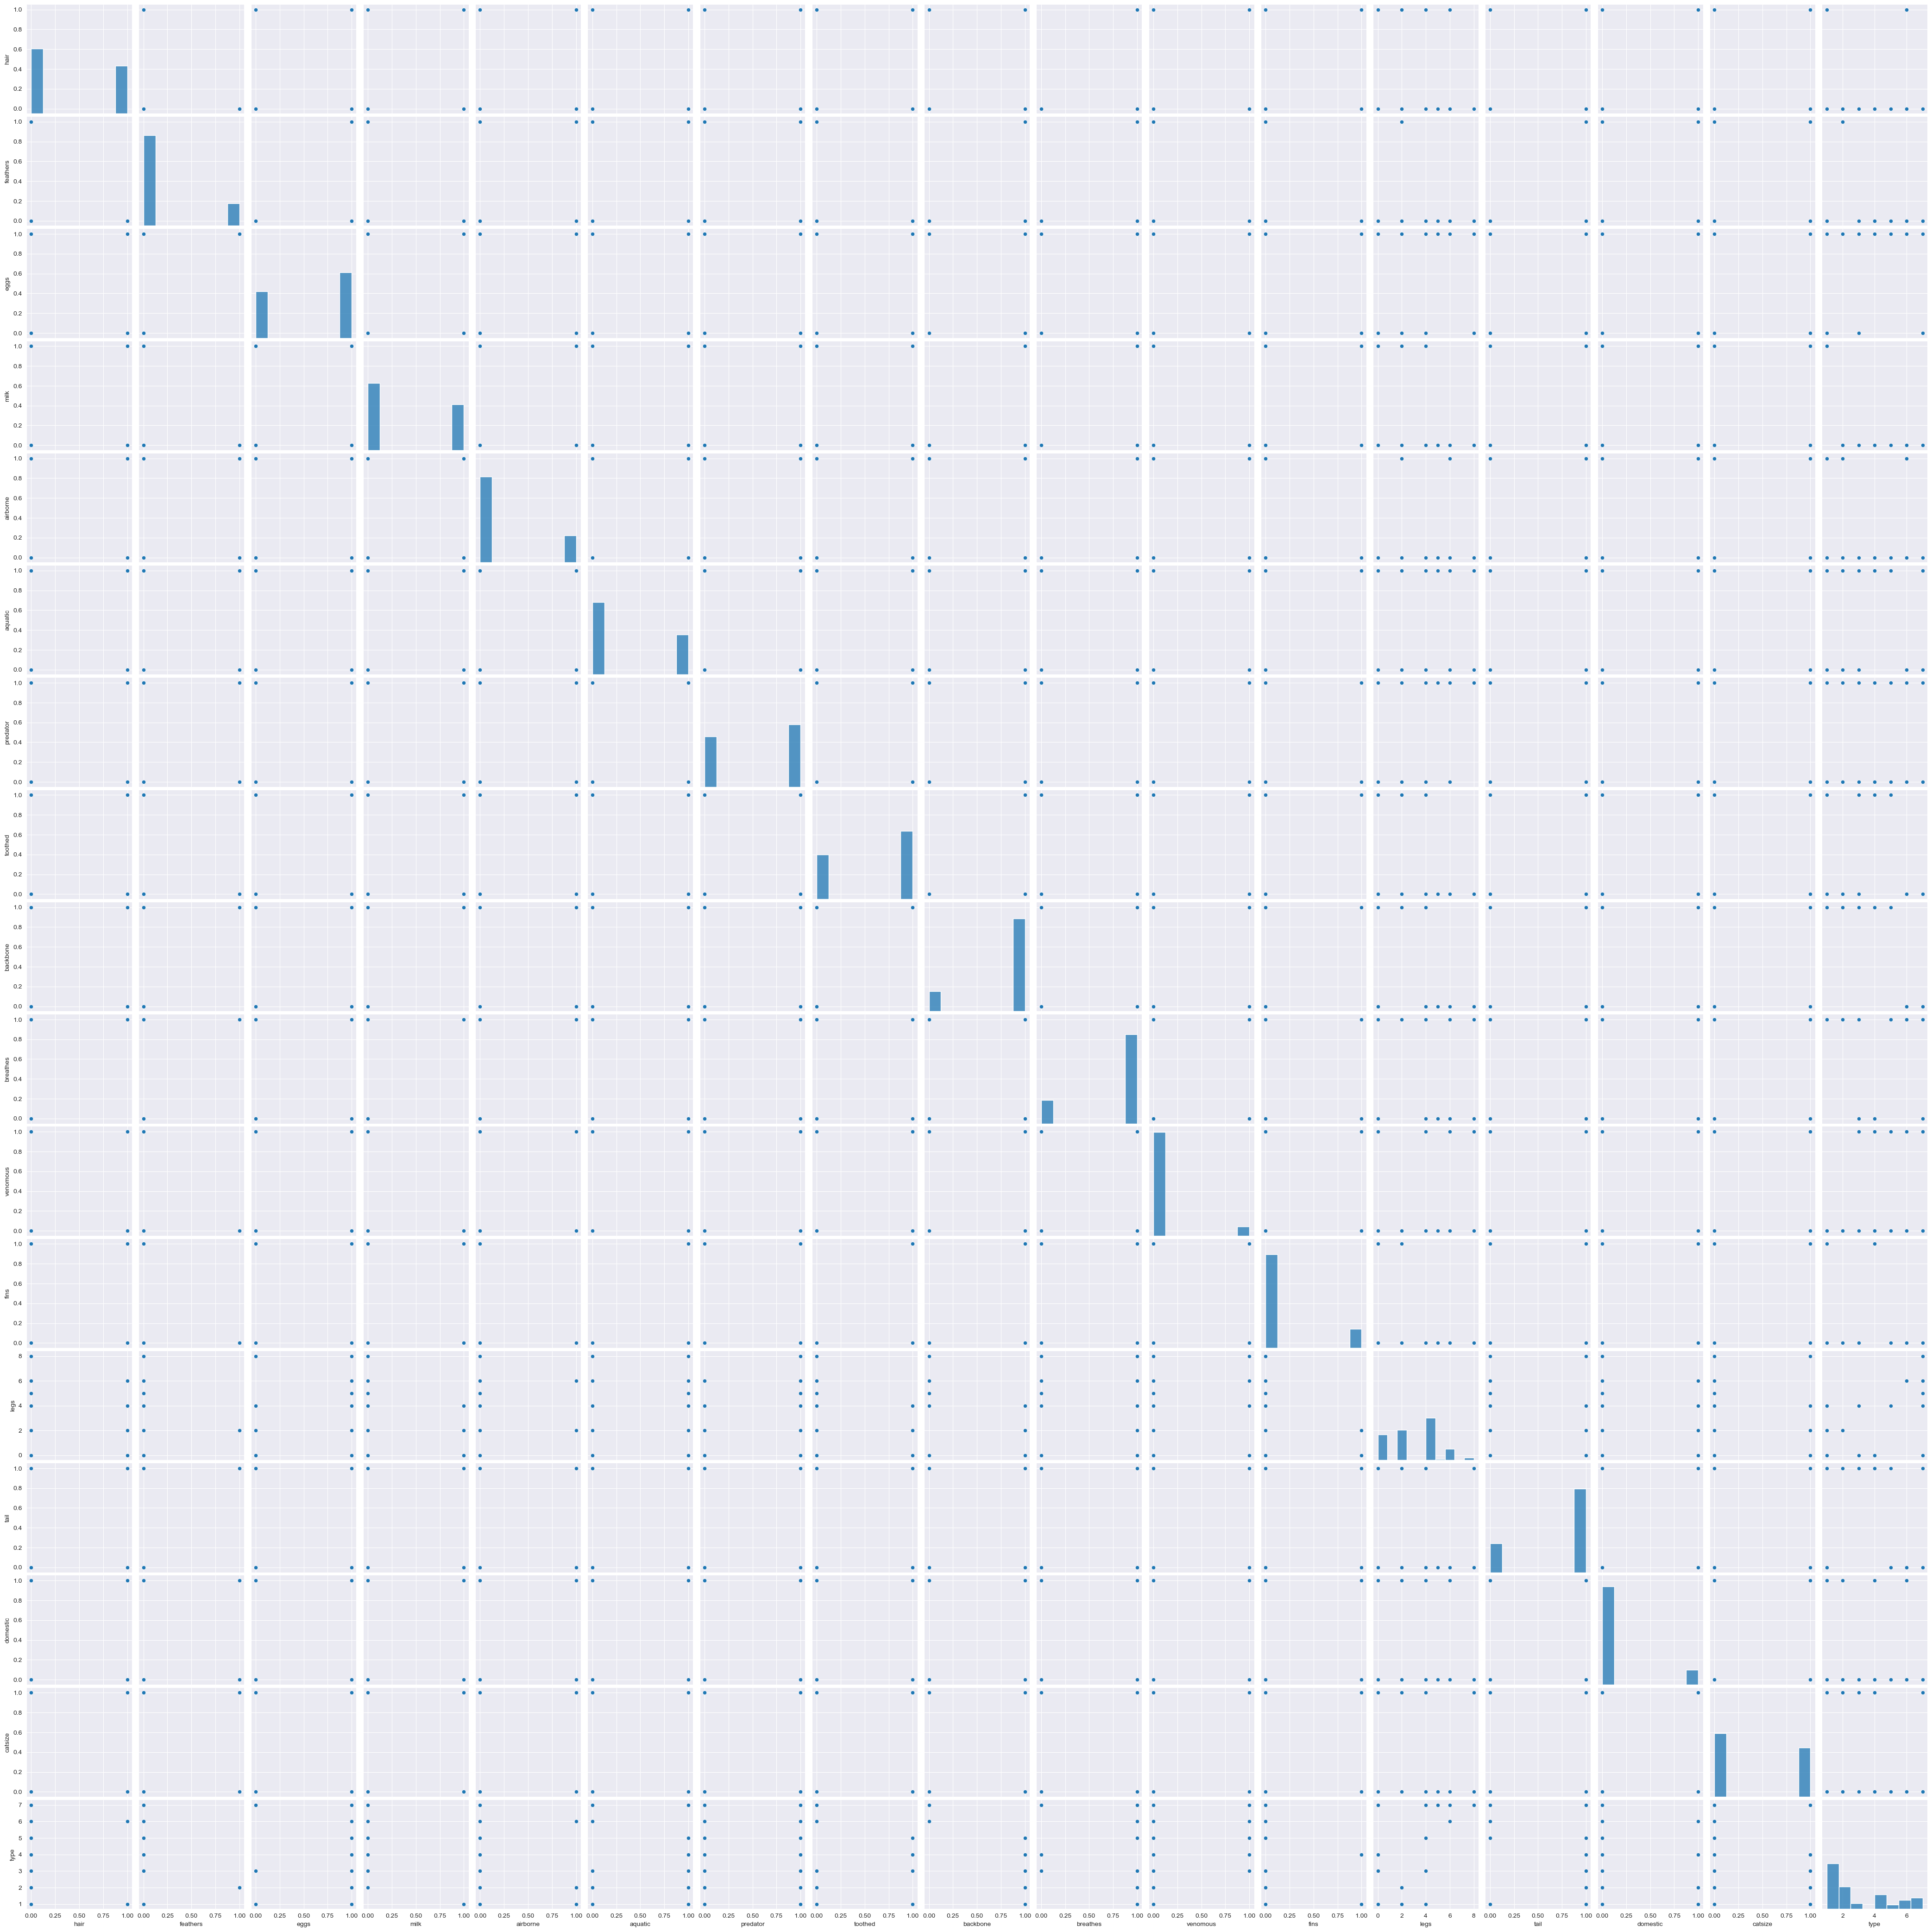

In [5]:
# EDA
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [6]:
# Split the X and Y variables
X = df.iloc[:,0:16]
Y = df.iloc[:,16]

In [7]:
# Data partition
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
X_train,X_test,Y_train,Y_test

(    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
 29     1         0     0     1         0        0         1        1   
 85     0         0     1     0         0        1         1        0   
 74     1         0     0     1         0        1         1        1   
 77     0         0     1     0         0        1         1        0   
 42     0         0     1     0         1        0         1        0   
 ..   ...       ...   ...   ...       ...      ...       ...      ...   
 62     0         0     1     0         0        0         1        1   
 13     0         0     1     0         0        0         1        0   
 38     0         0     1     0         0        1         1        1   
 4      1         0     0     1         0        0         1        1   
 50     1         0     0     1         0        0         1        1   
 
     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
 29         1         1         0     0     2    

In [8]:
# Model fitting

## find the best n_neighbors Value 

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [9]:
print(grid.best_score_)
print(grid.best_params_)

0.93
{'n_neighbors': 3}


In [10]:
# predict the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, Y_train)

Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)
Y_train_pred
Y_test_pred

array([2, 1, 7, 4, 2, 1, 4, 6, 1, 2, 1, 4, 5, 1, 2, 1, 1, 4, 1, 6, 1, 4,
       1, 1, 1, 5], dtype=int64)

In [11]:
# Model Evaluation

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_train_pred)
ac2 = accuracy_score(Y_test,Y_test_pred)
print("Accuracy score for Training data: ", ac1.round(2))
print("Accuracy score for Test data: ", ac2.round(2))

Accuracy score for Training data:  0.97
Accuracy score for Test data:  0.92


In [12]:
# Average values with all random_state values

knn = KNeighborsClassifier(n_neighbors=3,p=2)
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=i)
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test  = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
import numpy as np
print("Average Training accuracy",np.mean(training_accuracy).round(2))
print("Average Test accuracy",np.mean(test_accuracy).round(2))

Average Training accuracy 0.97
Average Test accuracy 0.89


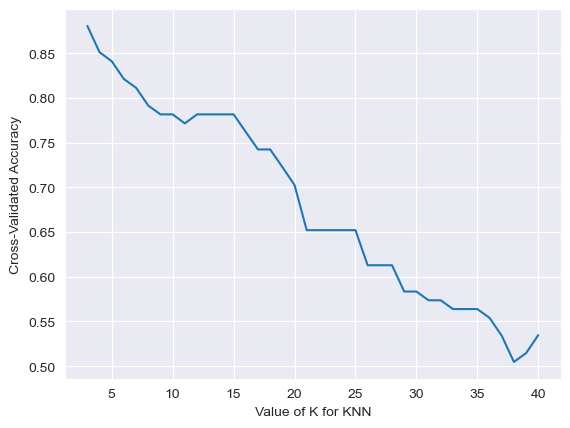

In [13]:
#Visualization by using K-fold method

import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score

%matplotlib inline
# choose k between 3 to 41
k_range = range(3, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=3)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()